# EDA on Analyst Ratings Dataset

This notebook demonstrates a modular exploratory data analysis (EDA) pipeline for the analyst ratings dataset. All analysis steps use reusable functions from the `src` folder.

**Version Control Reminder:**
- Commit your work regularly with descriptive messages.
- Use branches for different tasks (e.g., `task-1`).
- Do not commit raw data files (see `.gitignore`).

# imports

In [1]:
import sys
import os

# Get the absolute path to the project root (one level up from 'notbooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# Import required libraries and EDA modules
import pandas as pd
import matplotlib.pyplot as plt

# Import modular EDA components
from src import eda_descriptive, eda_text, eda_time, eda_publisher

## Load Data

The CSV file is not tracked by git (see `.gitignore`). Place `raw_analyst_ratings.csv` in the `data/` folder.

In [4]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Path relative to project root
df.head()# show first 5 rows
df.tail() # show last 5 rows

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


## Descriptive Statistics

### Headline Length Statistics
We compute basic statistics (count, mean, std, min, max, quartiles) for the length of headlines.

# Headline Length Statistics

In [5]:
# Compute and display headline length statistics
headline_stats = eda_descriptive.headline_length_stats(df, headline_col='headline')
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


### Articles per Publisher
Count the number of articles per publisher to identify the most active publishers.

In [6]:
# Count articles per publisher
publisher_counts = eda_descriptive.articles_per_publisher(df, publisher_col='publisher')
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


### Articles Over Time
Visualize the number of articles published over time to spot trends or spikes.

c:\Users\hp\Desktop\Stock-market-movement-prediction-using-news-sentiment-nlp-\src\eda_descriptive.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  counts = dates.groupby(dates.dt.to_period(freq)).count()


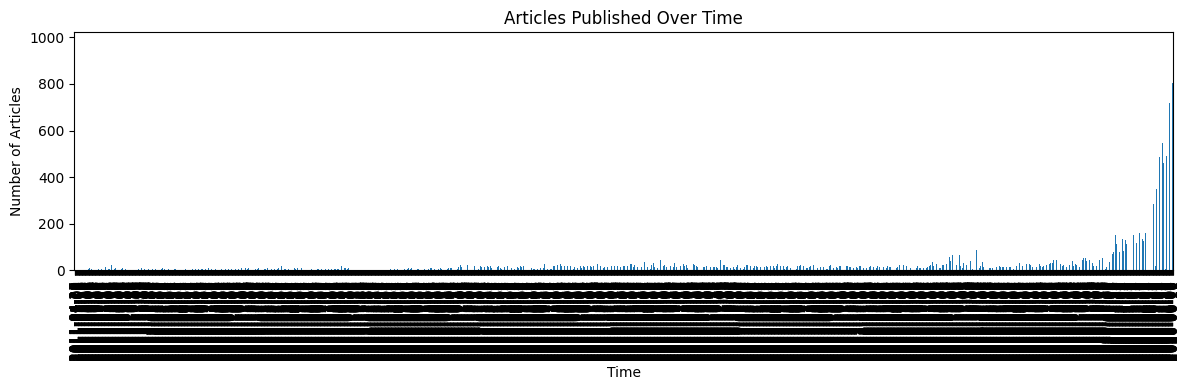

c:\Users\hp\Desktop\Stock-market-movement-prediction-using-news-sentiment-nlp-\src\eda_descriptive.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  counts = dates.groupby(dates.dt.to_period(freq)).count()


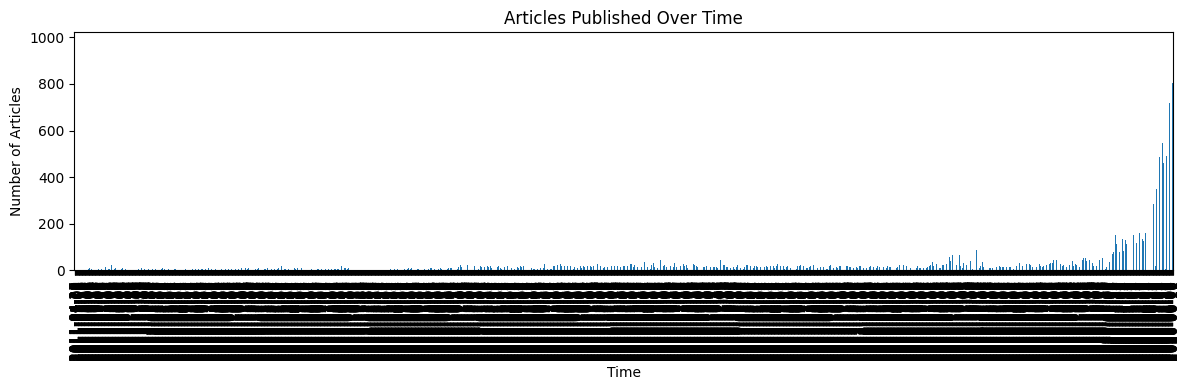

In [7]:
# Plot articles published over time
eda_descriptive.plot_articles_over_time(df, date_col='date', freq='D')
plt.show()# Plot articles published over time
eda_descriptive.plot_articles_over_time(df, date_col='date', freq='D')
plt.show()

## Text Analysis (Topic Modeling)

### Extract Common Keywords
Use NLP to extract the most common keywords from headlines.

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Extract most common keywords
keywords = eda_text.extract_keywords(df, text_col='headline', top_n=20)
print('Top 20 Keywords:')
for word, count in keywords:
    print(f'{word}: {count}')

Top 20 Keywords:
vs: 162062
stocks: 161868
est: 140579
eps: 128910
shares: 114182
reports: 108705
update: 91680
market: 90879
earnings: 87185
sales: 79524
top: 78648
pt: 73043
announces: 66528
price: 64231
buy: 64059
downgrades: 61942
trading: 61156
benzingas: 57985
raises: 57798
upgrades: 56804


### Simple Topic Modeling
Use Latent Dirichlet Allocation (LDA) to extract topics from headlines.

In [19]:
#Pre-filter the Data
df_filtered = df[df['headline'].str.len() > 10].drop_duplicates(subset='headline')

In [20]:
# Try with just 500 rows
topics = eda_text.simple_topic_modeling(df.sample(500, random_state=42), text_col='headline', n_topics=5, n_words=10)
for i, topic in enumerate(topics, 1):
    print(f'Topic {i}: {", ".join(topic)}')

Topic 1: vs, est, reports, eps, sales, q1, q3, revenue, q2, adj
Topic 2: update, mid, market, stocks, shares, day, earnings, higher, markets, industry
Topic 3: week, 52, stocks, raises, buy, earnings, pt, upgrades, maintains, lows
Topic 4: price, target, morgan, stocks, session, says, moving, pre, market, stanley
Topic 5: downgrades, trading, shares, market, hold, dividend, announces, benzinga, news, 10


In [22]:
# Perform simple topic modeling
topics = eda_text.simple_topic_modeling(df, text_col='headline', n_topics=5, n_words=10)
for i, topic in enumerate(topics, 1):
    print(f'Topic {i}: {", ".join(topic)}')

Topic 1: benzinga, energy, etfs, says, etf, share, sector, downgrades, bank, stocks
Topic 2: price, pt, announces, buy, target, maintains, raises, 00, initiates, neutral
Topic 3: vs, est, eps, reports, sales, sees, q2, estimate, q3, q1
Topic 4: shares, update, trading, higher, lower, companies, company, market, following, results
Topic 5: stocks, market, week, mid, earnings, 52, day, session, moving, stock


## Time Series Analysis

### Publication Frequency Over Time
Visualize how the publication frequency varies over time.

c:\Users\hp\Desktop\Stock-market-movement-prediction-using-news-sentiment-nlp-\src\eda_time.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  counts = dates.groupby(dates.dt.to_period(freq)).count()


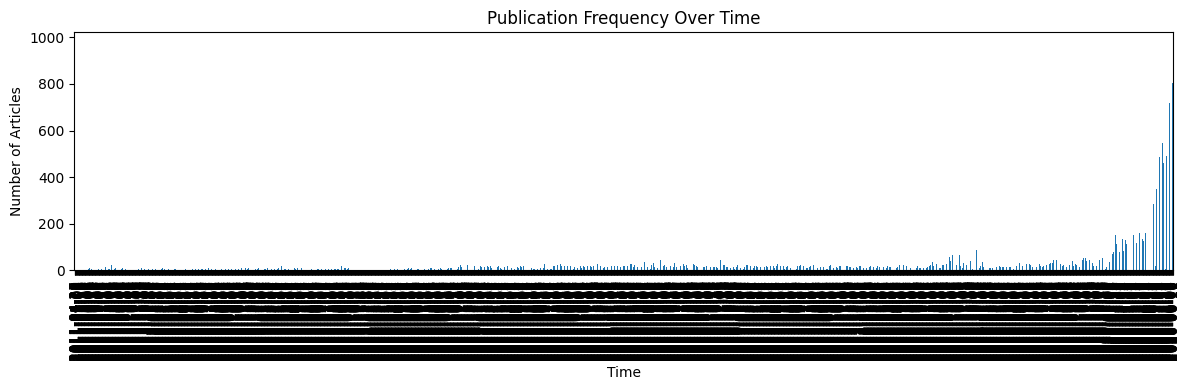

In [23]:
# Plot publication frequency over time
eda_time.publication_frequency(df, date_col='date', freq='D')
plt.show()

### Publishing Time Distribution (Hour of Day, Day of Week)
Analyze the distribution of publishing times to see if there are specific hours or days with more news.

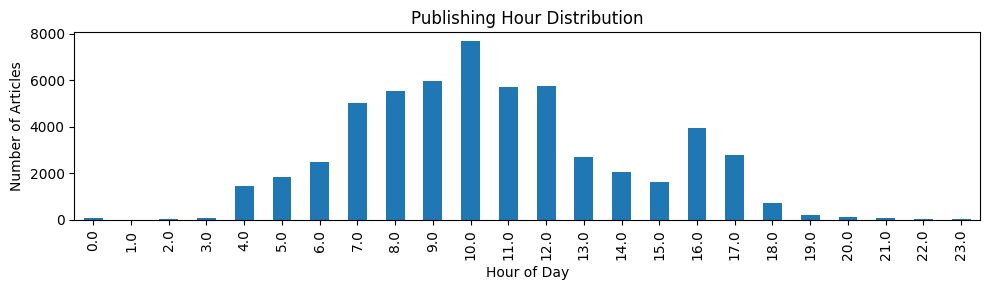

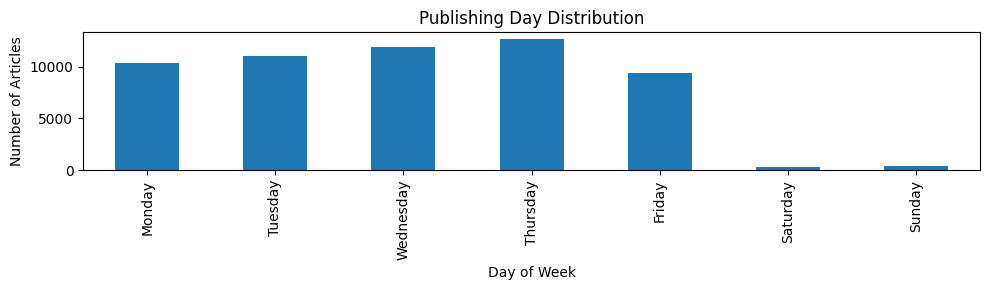

(<Axes: title={'center': 'Publishing Hour Distribution'}, xlabel='Hour of Day', ylabel='Number of Articles'>,
 <Axes: title={'center': 'Publishing Day Distribution'}, xlabel='Day of Week', ylabel='Number of Articles'>)

In [24]:
# Plot publishing time distribution
eda_time.publishing_time_distribution(df, date_col='date')

## Publisher Analysis

### Top Publishers
Identify the top publishers by article count.

In [25]:
# Identify top publishers
top_pubs = eda_publisher.top_publishers(df, publisher_col='publisher', top_n=10)
print(top_pubs)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


### Publisher Domains (if publisher is an email address)
If publisher names are emails, extract and analyze the most common domains.

In [26]:
# Analyze publisher domains
domains = eda_publisher.publisher_domains(df, publisher_col='publisher', top_n=10)
print('Top 10 Publisher Domains:')
for domain, count in domains:
    print(f'{domain}: {count}')

Top 10 Publisher Domains:
benzinga.com: 7937
gmail.com: 139
andyswan.com: 5
investdiva.com: 2
tothetick.com: 2
eosdetroit.io: 1
forextraininggroup.com: 1
stockmetrix.net: 1
